# Installation et imports

### Installation des modules 

In [840]:
%pip install Pandas


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [841]:
%pip install joblib


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [842]:
%pip install Matplotlib 


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [843]:
%pip install Scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [844]:
%pip install Numpy


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [845]:
%pip install tqdm
from tqdm import tqdm


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Import

In [846]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as plt
import matplotlib.pyplot as plt
import math


# Répartition des données

### Répartition holdout 

In [847]:
from sklearn.model_selection import train_test_split

In [848]:
#fRépartition des données en base d’apprentissage et de tests en utilisant l'algorithmes holdout 
def holdout(dataframe, colonne_predict, num_rep, train_s, test_s ):
        liste_data_train_test = [] 
        liste_data = []
        clean_data = dataframe.drop(colonne_predict, axis = 1) #supprime du dataframe la colonne qu'on souhaite prédire
        y = dataframe[colonne_predict] #sélectionne la colonne à prédire
        for i in range(num_rep): # on crée n répartition
                X_train, X_test, y_train, y_test = train_test_split(clean_data,y, train_size= train_s, test_size = test_s) #sépare clean_data et y en base de test et d'apprentissage
                X_train = X_train.reset_index(drop=True) #on remet à jour la numérotation des lignes
                y_train = y_train.reset_index(drop=True)
                X_test = X_test.reset_index(drop=True)
                y_test = y_test.reset_index(drop=True)
                liste_data_train_test.append([X_train, X_test, y_train, y_test]) #sauvegarde dans une liste 
        return liste_data_train_test # liste contenant n quadruplet

### Répartition Leave One Out

In [849]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier

In [850]:
#fRépartition des données en base d’apprentissage et de tests en utilisant l'algorithmes leave one out 
def leaveoneout(dataframe, colonne_predict,k, distance_metric):
    liste_y_pred = []
    liste_y_test = []
    X = dataframe.drop(colonne_predict, axis = 1) #supprime du dataframe la colonne qu'on souhaite prédire
    y = dataframe[colonne_predict] #sélectionne la colonne à prédire
    LOO = LeaveOneOut() #création objet leave one out
    knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric) #création objet knn
    
    for train_index, test_index in (LOO.split(X)): #train_index = toute les lignes sauf une, train_index = une ligne, LOO.split(X) = sépare la base de données
        X_train, X_test = X.iloc[train_index], X.iloc[test_index] # sépare X en train et test selon les indices des lignes
        y_train, y_test = y.iloc[train_index], y.iloc[test_index] # sépare y en train et test selon les indices des lignes
        knn.fit(X_train, y_train) #knn apprentissage
        y_pred = knn.predict(X_test) #knn prediction 
        liste_y_pred.append(y_pred) # sauvegarde des y prédit dans une liste
        liste_y_test.append(y_test) # sauvegarde des y test dans une liste
        
    return liste_y_pred, liste_y_test # on retourne les listes de y predit et test

# Classification avec KNN

### Fonctions from scratch

In [851]:
#Fonction de classification knn
def KnnClassification(ligne,y_train,df,k, distance_metric):
    dictList = [None] * len(df) #créer une liste de None de la taille de df
    liste_y_pred = []

    if distance_metric == 'euclidean': 
        for index, row in df.iterrows():  #parcour chaque ligne du df
            dictList[index] = np.linalg.norm(ligne - row) #calcul de la distance et la stock dans dictlist

    if distance_metric == 'manhattan' : 
        for index, row in df.iterrows():
            dictList[index] = np.sum(np.abs(ligne - row))
        
    sorted_values = sorted(enumerate(dictList), key=lambda x: x[1])[:k] #trie dictlist en fonction de la distance
    print(sorted_values)
    for index,value in sorted_values: #parcour la liste trier
        liste_y_pred.append(y_train[index]) #on associe l'index du df au y_train correspondant et l'ajoute dans une liste
    
    y_pred = np.bincount(liste_y_pred).argmax() #on trouve la classe majoritaire dans les k plus proche voisin
        
    return y_pred #retourne la valeur y prédite

### Scikit learn

In [852]:
#prediction holdout sklearn
def  KnnClassification_sk_learn(liste_data,k, distance_metric):
    knn = KNeighborsClassifier(n_neighbors=k, metric = distance_metric) #creation de l'objet knn 
    liste_y_pred_holdout_sk = []
    liste_y_test_holdout_sk = []
    for i in range(len(liste_data)):
        #on récupère les répartition contenu dans la liste d'entrée
        X_train = liste_data[i][0]
        X_test = liste_data[i][1]
        y_train = liste_data[i][2]
        y_test = liste_data[i][3]
        knn.fit(X_train, y_train) # apprentissage 
        y_pred = knn.predict(X_test) #prédiction
        liste_y_pred_holdout_sk.append(y_pred) # sauvegarde y_pred
        liste_y_test_holdout_sk.append(y_test) # sauvegarde y_test
    return liste_y_pred_holdout_sk, liste_y_test_holdout_sk #retourne les listes y_test et y_pred

### Calcul de score

In [853]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [854]:
def reduire_data(data): 
    counts = data['descr_grav'].value_counts() #compte le nombre d'occurence de chaque classe

    total_0 = counts[0]/len(data) #on calcul la proportion d'indemne
    total_1 = counts[1]/len(data) #on calcul la proportion de blessé
    total_2 = counts[2]/len(data) #on calcul la proportion d'hospitalisé
    total_3 = counts[3]/len(data) #on calcul la proportion de tué

    Proportion_0 = data[data['descr_grav'] == 0].sample(n=int(7500*total_0)) #on sélectionne dans le df tous les accidents de gravité 0, on prend au hasard un nombre de ligne en fonction de la proportion
    Proportion_1 = data[data['descr_grav'] == 1].sample(n=int(7500*total_1))
    Proportion_2 = data[data['descr_grav'] == 2].sample(n=int(7500*total_2))
    Proportion_3 = data[data['descr_grav'] == 3].sample(n=int(7500*total_3))

    data_reduit = pd.concat([Proportion_0,Proportion_1, Proportion_2, Proportion_3]) #création du nouveau dataframe
    data_reduit = data_reduit.reset_index(drop=True) #on remet la numérotation des index à 0
    data_reduit = data_reduit.drop(columns=["latitude", "longitude"]) #supression de la longitude et de la lattitude
    
    return data_reduit

In [855]:
data = pd.read_csv("../dfClean.csv")
data_reduit = reduire_data(data)

In [856]:
def resultat_leaveoneout(data, param_predit, distance_metric):

    liste_score = []

    for k in [5,7,10] : #boucle avec 3 k different
        #Répartition leave One Out
        y_pred_LOO, y_test_LOO = leaveoneout(data, param_predit, k, distance_metric) #prédiction avec leave one out
        matrice_confusion = confusion_matrix(y_test_LOO,y_pred_LOO, normalize='true') # création de la matrice de confusion
        Display = ConfusionMatrixDisplay(confusion_matrix = matrice_confusion, display_labels= ['indemme', 'blessé', 'hospitalisé', 'tué'])
        Display.plot(values_format=".2%") #graphique matrice
        plt.show()

        # Score répartition leave One Out
        accuracy_LOO = accuracy_score(y_test_LOO, y_pred_LOO) #calcul du score 
        liste_score.append(accuracy_LOO*100) #ajout du score dans une liste 

    plt.plot([5,7,10], liste_score, label='Score') #création du graphique de k en fonction des score obtenus

    # Ajouter des légendes et des titres
    plt.xlabel('Valeurs de K')
    plt.ylabel('Score')
    plt.title('Scores leave one out knn en fonction de K avec ' + distance_metric)
    plt.legend()

    # Afficher le graphique
    plt.show()


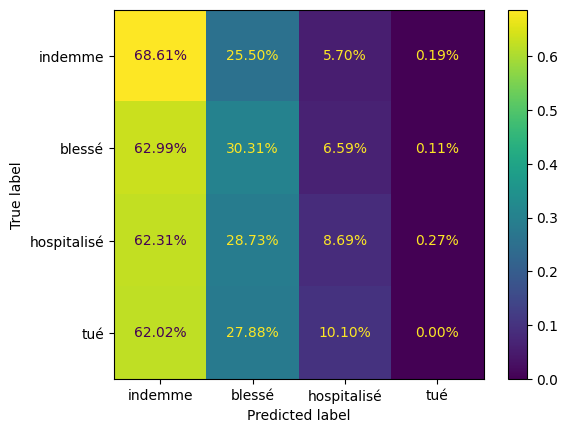

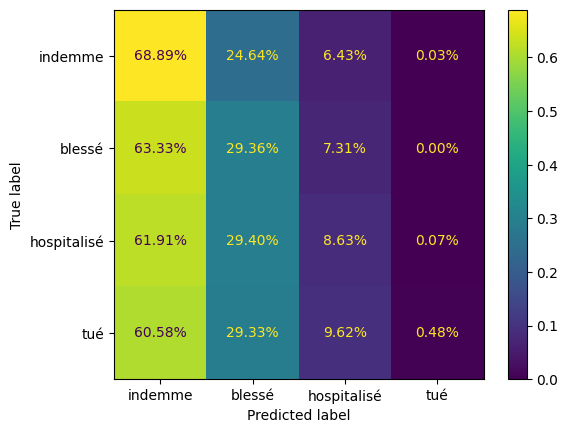

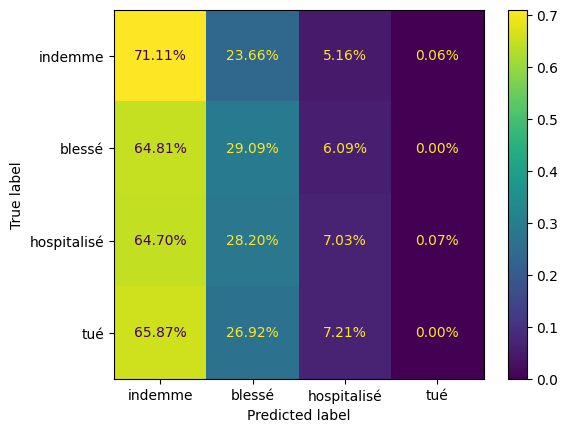

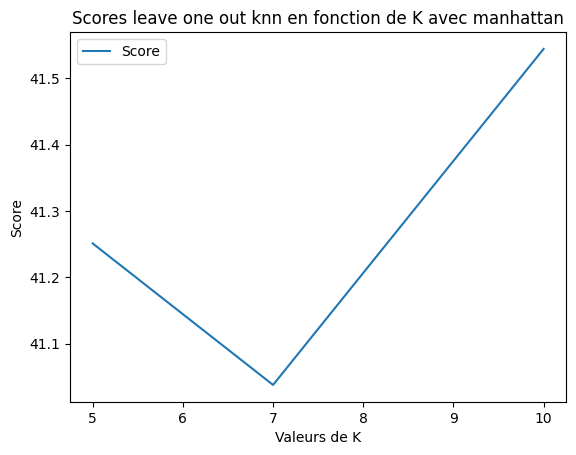

In [857]:
resultat_leaveoneout(data_reduit, "descr_grav", 'manhattan')

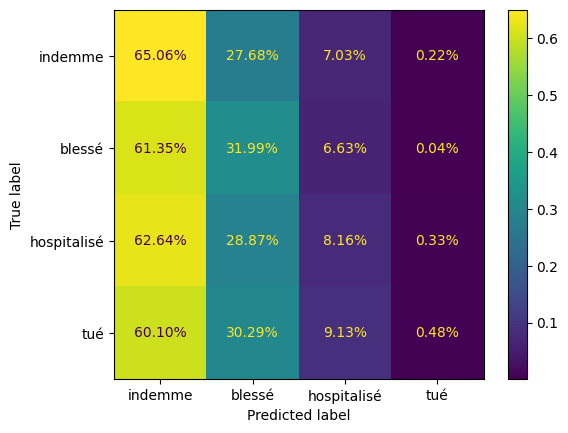

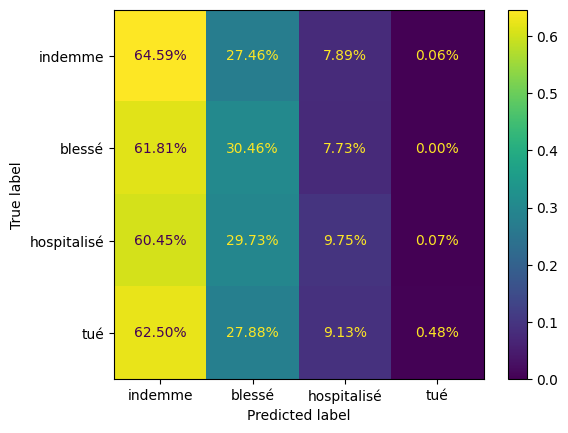

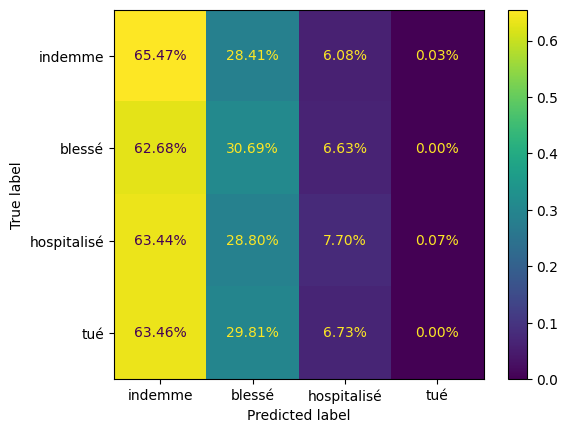

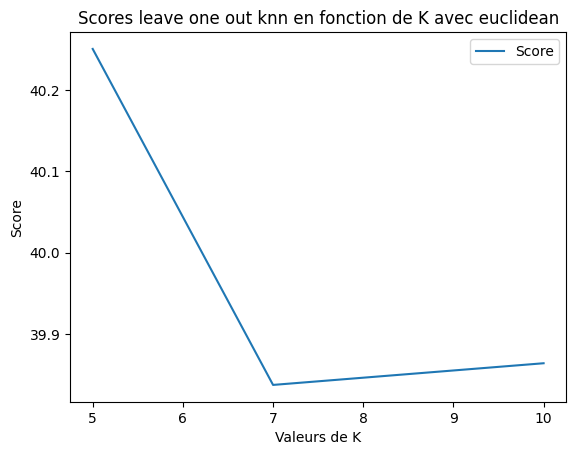

In [858]:
resultat_leaveoneout(data_reduit, "descr_grav", 'euclidean')

In [859]:
def score_holdout_scratch(data, param_predit, distance_metric): 
    #Répartition hold out
    liste_data_holdout  = holdout(data, param_predit, 5, 0.8, 0.2) #répartition base test et apprentissage

    # Prediction holdout from scratch
    #sélection d'un quatuor
    X_test_0 = liste_data_holdout[0][1]
    y_train_0  = liste_data_holdout[0][2]
    X_train_0 = liste_data_holdout[0][0]
    y_test_0 =  liste_data_holdout[0][3]
   

    liste_score = []

    for k in [5,7,10]: #boucle avec 3 k different
        liste_y_pred_holdout = []
    
        for i in range(len(X_test_0)): #prediction sur toutes les lignes de la base test
            y_pred_holdout = KnnClassification(X_test_0.loc[i], y_train_0, X_train_0, k, distance_metric)#prediction
            liste_y_pred_holdout.append(y_pred_holdout) #sauvergarde dans une liste

        matrice_confusion = confusion_matrix(y_test_0, liste_y_pred_holdout, normalize='true') #calcul de la matrice
        Display = ConfusionMatrixDisplay(confusion_matrix = matrice_confusion, display_labels= ['indemme', 'blessé', 'hospitalisé', 'tué']) # création de la matrice
        Display.plot(values_format=".2%") 
        plt.show()

        accuracy = accuracy_score(y_test_0, liste_y_pred_holdout) #calcul du score
        liste_score.append(accuracy*100) #sauvergade du score

    
    plt.plot([5,7,10], liste_score, label='Score') #création du graphique de k en fonction des score obtenus

    # Ajouter des légendes et des titres
    plt.xlabel('Valeurs de K')
    plt.ylabel('Score')
    plt.title('Scores holdout knn en fonction de K en distance '+ distance_metric)
    plt.legend()

    # Afficher le graphique
    plt.show()
        

    

[(4966, 3.605551275463989), (1017, 5.0990195135927845), (513, 6.855654600401044), (4927, 10.677078252031311), (3340, 14.177446878757825)]
[(55, 4.123105625617661), (4050, 4.123105625617661), (5267, 6.164414002968976), (251, 6.244997998398398), (1320, 7.0)]
[(881, 3.0), (3466, 3.1622776601683795), (550, 3.605551275463989), (5592, 5.0990195135927845), (4580, 7.615773105863909)]
[(5506, 5.5677643628300215), (4349, 6.244997998398398), (4792, 9.1104335791443), (4163, 12.083045973594572), (2968, 13.038404810405298)]
[(940, 1.4142135623730951), (695, 7.14142842854285), (5323, 7.14142842854285), (5581, 7.937253933193772), (2442, 9.746794344808963)]
[(3199, 0.0), (3923, 1.0), (1022, 2.23606797749979), (2297, 2.23606797749979), (3545, 2.23606797749979)]
[(452, 1.4142135623730951), (4271, 1.4142135623730951), (1598, 6.082762530298219), (2128, 13.038404810405298), (4968, 14.0)]
[(886, 4.0), (1446, 4.795831523312719), (2595, 4.898979485566356), (5085, 10.63014581273465), (755, 14.66287829861518)]
[

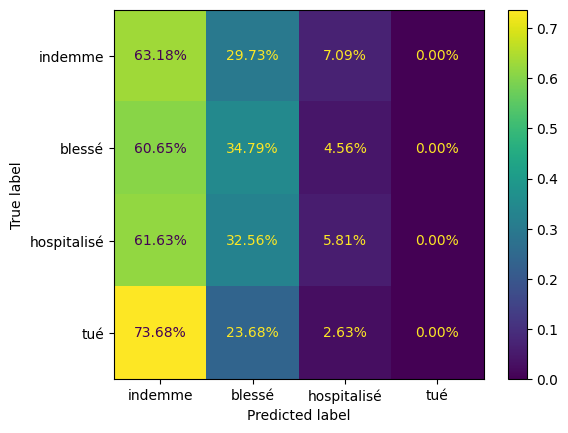

[(4966, 3.605551275463989), (1017, 5.0990195135927845), (513, 6.855654600401044), (4927, 10.677078252031311), (3340, 14.177446878757825), (1366, 20.346989949375804), (2310, 22.0)]
[(55, 4.123105625617661), (4050, 4.123105625617661), (5267, 6.164414002968976), (251, 6.244997998398398), (1320, 7.0), (2685, 7.0), (4060, 7.0710678118654755)]
[(881, 3.0), (3466, 3.1622776601683795), (550, 3.605551275463989), (5592, 5.0990195135927845), (4580, 7.615773105863909), (4613, 8.602325267042627), (5198, 9.486832980505138)]
[(5506, 5.5677643628300215), (4349, 6.244997998398398), (4792, 9.1104335791443), (4163, 12.083045973594572), (2968, 13.038404810405298), (4121, 13.076696830622021), (3416, 15.459624833740307)]
[(940, 1.4142135623730951), (695, 7.14142842854285), (5323, 7.14142842854285), (5581, 7.937253933193772), (2442, 9.746794344808963), (5438, 11.61895003862225), (501, 12.569805089976535)]
[(3199, 0.0), (3923, 1.0), (1022, 2.23606797749979), (2297, 2.23606797749979), (3545, 2.23606797749979),

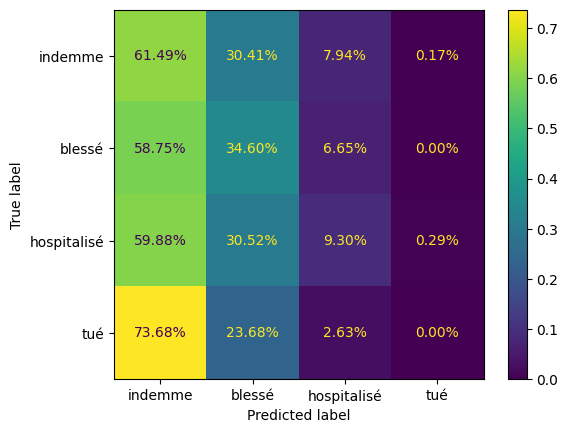

[(4966, 3.605551275463989), (1017, 5.0990195135927845), (513, 6.855654600401044), (4927, 10.677078252031311), (3340, 14.177446878757825), (1366, 20.346989949375804), (2310, 22.0), (4477, 23.0), (5263, 25.748786379167466), (3975, 33.19638534539566)]
[(55, 4.123105625617661), (4050, 4.123105625617661), (5267, 6.164414002968976), (251, 6.244997998398398), (1320, 7.0), (2685, 7.0), (4060, 7.0710678118654755), (3989, 7.937253933193772), (4209, 11.445523142259598), (653, 13.490737563232042)]
[(881, 3.0), (3466, 3.1622776601683795), (550, 3.605551275463989), (5592, 5.0990195135927845), (4580, 7.615773105863909), (4613, 8.602325267042627), (5198, 9.486832980505138), (5893, 11.958260743101398), (1782, 14.66287829861518), (4363, 16.73320053068151)]
[(5506, 5.5677643628300215), (4349, 6.244997998398398), (4792, 9.1104335791443), (4163, 12.083045973594572), (2968, 13.038404810405298), (4121, 13.076696830622021), (3416, 15.459624833740307), (3983, 16.46207763315433), (4449, 18.384776310850235), (34

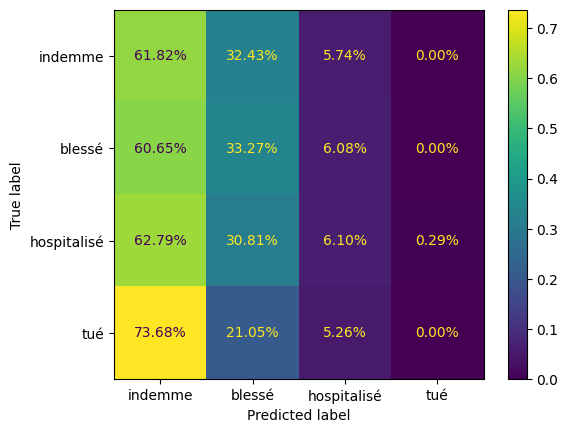

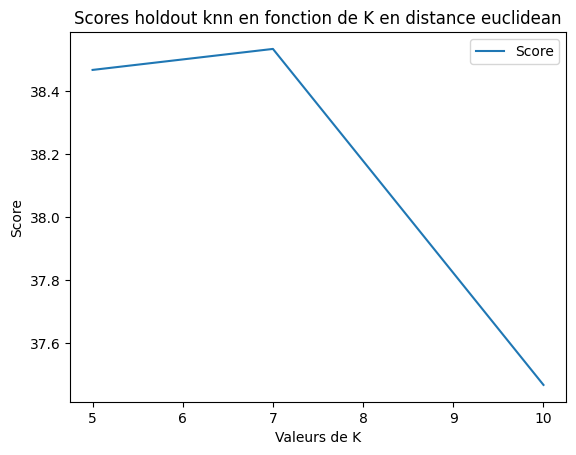

In [860]:
score_holdout_scratch(data_reduit, "descr_grav", 'euclidean') 

[(1621, 9), (3034, 17), (3421, 20), (745, 22), (2943, 29)]
[(3882, 1), (2670, 7), (5833, 9), (2279, 10), (4736, 18)]
[(3955, 4), (1892, 5), (2378, 8), (5521, 8), (5508, 9)]
[(71, 5), (1852, 6), (3160, 7), (1237, 9), (1700, 12)]
[(3767, 6), (5133, 8), (3101, 10), (5591, 10), (4220, 13)]
[(1318, 7), (631, 8), (3544, 12), (853, 13), (997, 13)]
[(1436, 6), (5424, 7), (2481, 10), (4023, 11), (1398, 14)]
[(450, 19), (76, 24), (554, 30), (3762, 31), (5893, 36)]
[(2187, 0), (2534, 6), (1049, 8), (4353, 9), (5685, 14)]
[(1906, 0), (4878, 8), (3820, 10), (4005, 11), (2994, 12)]
[(2893, 7), (5627, 7), (5842, 7), (5992, 10), (1103, 13)]
[(762, 5), (2106, 6), (2747, 6), (940, 8), (1995, 8)]
[(1645, 8), (1023, 12), (3858, 12), (5660, 12), (1407, 18)]
[(146, 2), (321, 12), (1899, 17), (3637, 23), (3004, 24)]
[(2172, 14), (4062, 14), (4792, 16), (5922, 18), (5807, 19)]
[(1235, 1), (1430, 2), (5441, 2), (166, 3), (766, 11)]
[(1805, 1), (370, 12), (5485, 14), (4970, 19), (5270, 19)]
[(5277, 6), (5621, 7

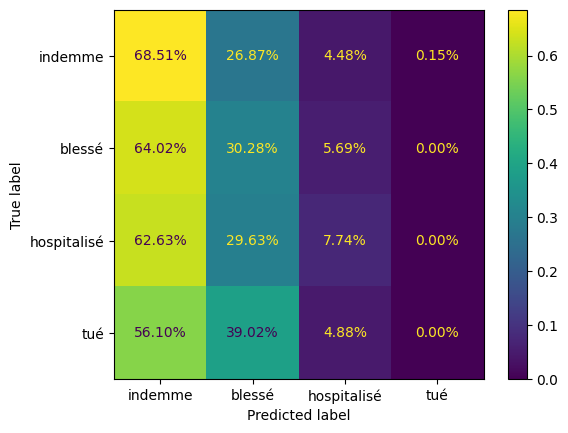

[(1621, 9), (3034, 17), (3421, 20), (745, 22), (2943, 29), (5652, 29), (5166, 30)]
[(3882, 1), (2670, 7), (5833, 9), (2279, 10), (4736, 18), (4082, 20), (2247, 24)]
[(3955, 4), (1892, 5), (2378, 8), (5521, 8), (5508, 9), (1300, 10), (787, 13)]
[(71, 5), (1852, 6), (3160, 7), (1237, 9), (1700, 12), (4492, 18), (2728, 20)]
[(3767, 6), (5133, 8), (3101, 10), (5591, 10), (4220, 13), (3481, 15), (2619, 17)]
[(1318, 7), (631, 8), (3544, 12), (853, 13), (997, 13), (4837, 14), (4568, 16)]
[(1436, 6), (5424, 7), (2481, 10), (4023, 11), (1398, 14), (5509, 16), (5845, 17)]
[(450, 19), (76, 24), (554, 30), (3762, 31), (5893, 36), (984, 37), (5225, 39)]
[(2187, 0), (2534, 6), (1049, 8), (4353, 9), (5685, 14), (4826, 15), (482, 16)]
[(1906, 0), (4878, 8), (3820, 10), (4005, 11), (2994, 12), (5829, 12), (1764, 13)]
[(2893, 7), (5627, 7), (5842, 7), (5992, 10), (1103, 13), (2446, 19), (1520, 21)]
[(762, 5), (2106, 6), (2747, 6), (940, 8), (1995, 8), (799, 10), (5122, 10)]
[(1645, 8), (1023, 12), (3858

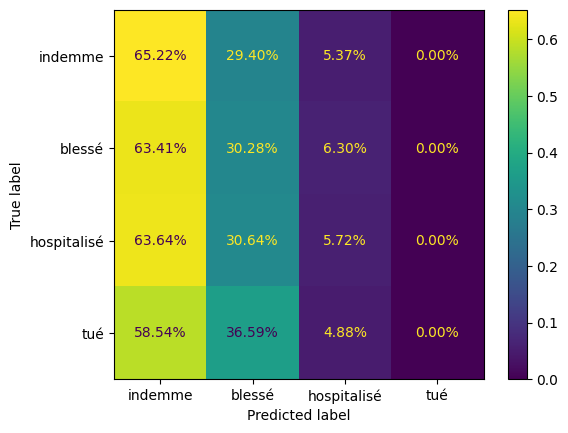

[(1621, 9), (3034, 17), (3421, 20), (745, 22), (2943, 29), (5652, 29), (5166, 30), (5975, 31), (3093, 33), (4591, 35)]
[(3882, 1), (2670, 7), (5833, 9), (2279, 10), (4736, 18), (4082, 20), (2247, 24), (3875, 26), (1319, 28), (1898, 37)]
[(3955, 4), (1892, 5), (2378, 8), (5521, 8), (5508, 9), (1300, 10), (787, 13), (3091, 15), (4803, 16), (5013, 19)]
[(71, 5), (1852, 6), (3160, 7), (1237, 9), (1700, 12), (4492, 18), (2728, 20), (3667, 24), (1254, 25), (3141, 32)]
[(3767, 6), (5133, 8), (3101, 10), (5591, 10), (4220, 13), (3481, 15), (2619, 17), (3709, 22), (706, 23), (3019, 23)]
[(1318, 7), (631, 8), (3544, 12), (853, 13), (997, 13), (4837, 14), (4568, 16), (3314, 17), (2675, 21), (4474, 29)]
[(1436, 6), (5424, 7), (2481, 10), (4023, 11), (1398, 14), (5509, 16), (5845, 17), (263, 20), (233, 25), (5333, 28)]
[(450, 19), (76, 24), (554, 30), (3762, 31), (5893, 36), (984, 37), (5225, 39), (5095, 41), (4896, 46), (2495, 49)]
[(2187, 0), (2534, 6), (1049, 8), (4353, 9), (5685, 14), (4826, 15

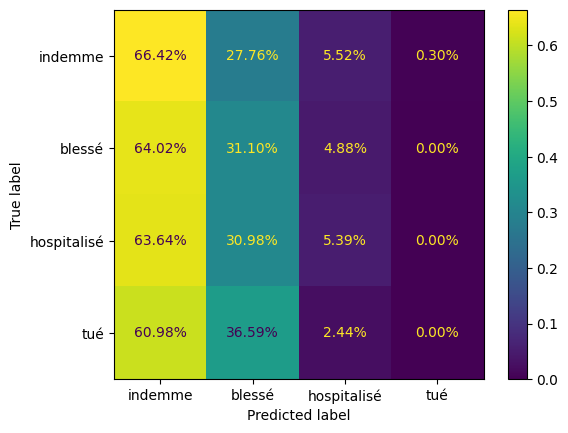

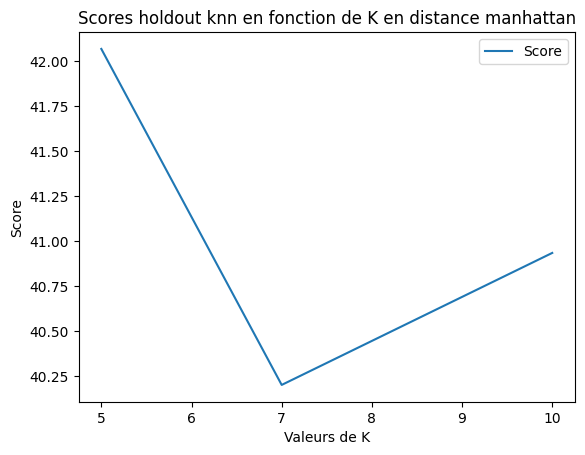

In [861]:
score_holdout_scratch(data_reduit, "descr_grav", 'manhattan') 

In [862]:
def resultat_holdout_sk(data, param_predit, distance_metric):

    #Score prediction holdout scikit learn
    liste_data_holdout  = holdout(data, param_predit, 5, 0.8, 0.2)  #répartition base test et apprentissage
    liste_accuracy_holdout_sk = []
    liste_moyenne_score = []


    for k in [5,7,10]:
        liste_y_pred_holdout_sk, liste_y_test_holdout_sk = KnnClassification_sk_learn(liste_data_holdout,k, distance_metric)#prediction knn
        
        matrice_confusion = confusion_matrix(liste_y_test_holdout_sk[0], liste_y_pred_holdout_sk[0], normalize='true')
        Display = ConfusionMatrixDisplay(confusion_matrix = matrice_confusion, display_labels= ['indemme', 'blessé', 'hospitalisé', 'tué'])
        Display.plot(values_format=".2%")
        plt.show()

        liste_score =[]
        for i in range(5):
            accuracy_holdout_sk = accuracy_score(liste_y_test_holdout_sk[i], liste_y_pred_holdout_sk[i])#calcul score avec chaque quatuor
            liste_score.append(accuracy_holdout_sk)#sauvegarde dans une liste
        liste_accuracy_holdout_sk.append(liste_score) #sauvergarde dans une liste pour avoir les scores de chaque k

    for j in range(len(liste_accuracy_holdout_sk)): 
        moyenne_score = np.mean(liste_accuracy_holdout_sk[j]) #calcul des score pour chaque k
        liste_moyenne_score.append(moyenne_score) #sauvegarde 

    plt.plot([5,7,10], liste_accuracy_holdout_sk) #affiche les scores en fonction de k
    plt.plot([5,7,10], liste_moyenne_score, label = 'mean') #affiche score moyen en fonction de k

    # Ajouter des légendes et des titres
    plt.xlabel('Valeurs de K')
    plt.ylabel('Scores')
    plt.title('Scores holdout knn en fonction de K en distance '+ distance_metric)
    plt.legend()

    # Afficher le graphique
    plt.show()
        

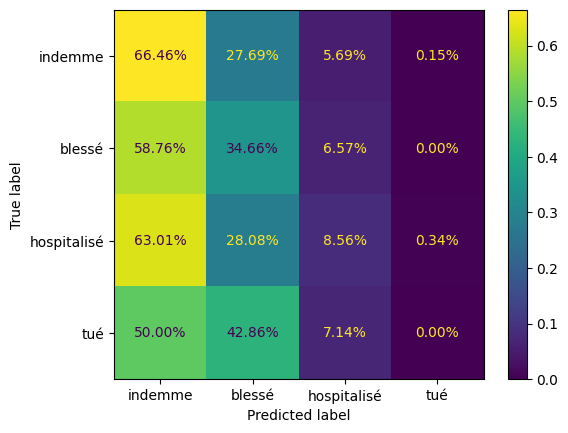

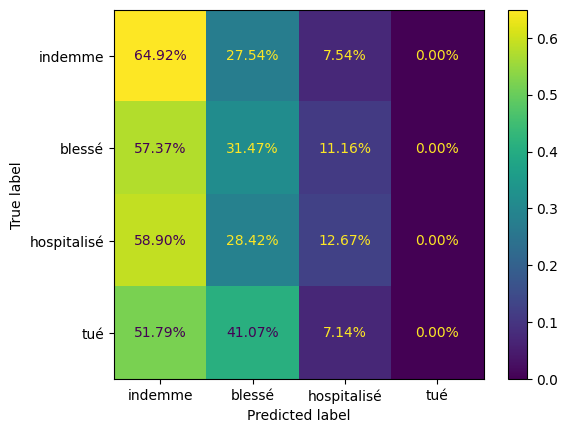

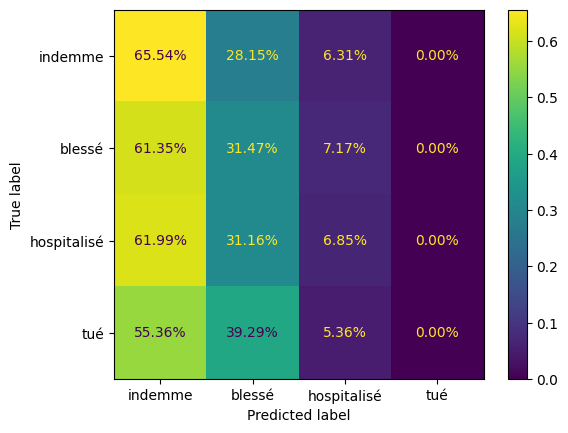

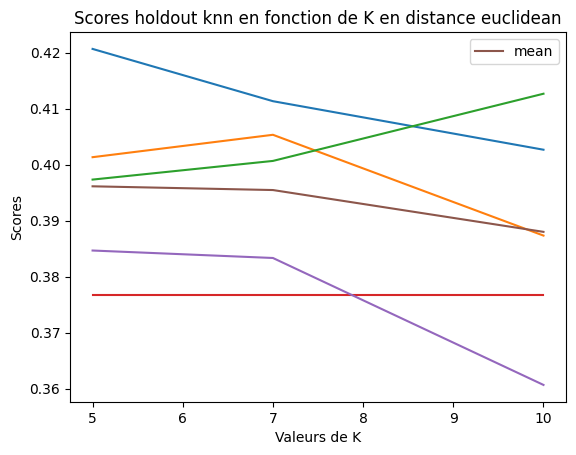

In [863]:
resultat_holdout_sk(data_reduit,  "descr_grav", 'euclidean')

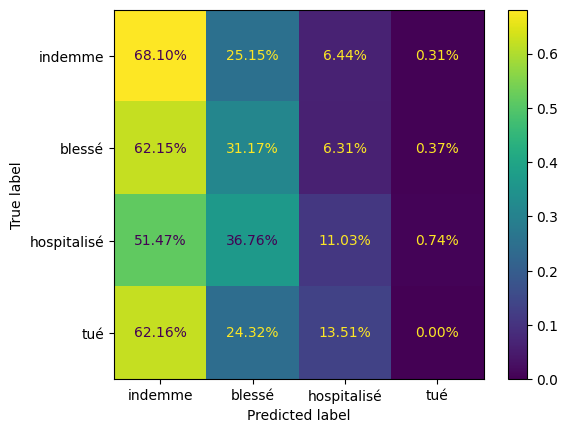

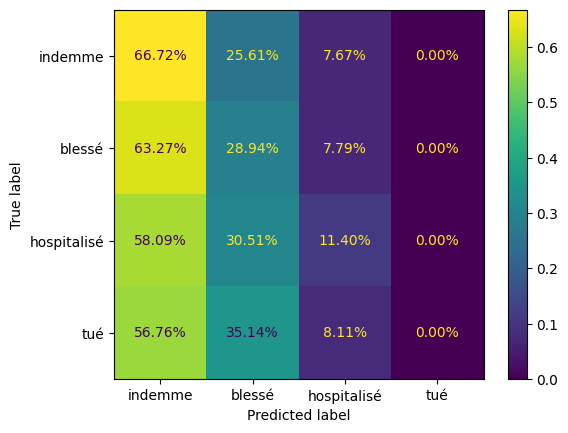

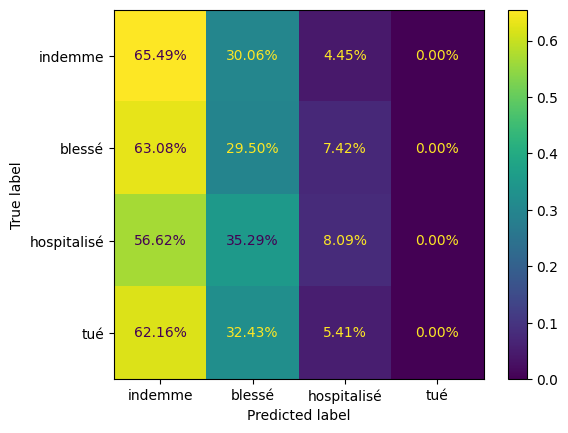

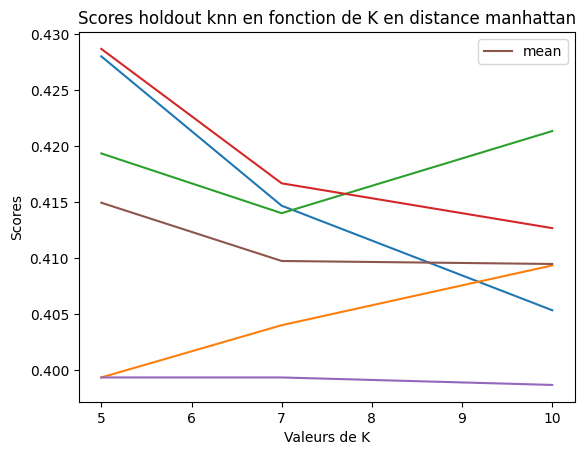

In [864]:
resultat_holdout_sk(data_reduit,  "descr_grav", 'manhattan')

# Évaluation quantitative des résultats

# Classification algorithme haut niveau

In [865]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### SVM

In [866]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import joblib

In [867]:
df = pd.read_csv("../dfClean.csv")


#on crée un partitionement du dataframe (6%)
df = df.sample(frac=0.15, random_state=16)


df.reset_index(drop=True, inplace=True)  # on remet l'index sur la colonne correspondante (au cas ou)


# on crée les df avec la colonne a prédire et les colonnes pour prédire
feature_columns = df.columns.drop('descr_grav')#tout sauf descr_grav
target_column = 'descr_grav'

X = df[feature_columns]
y = df[target_column]

# on définit les paramètres de gridsearch
param_grid = {
    'C': [0.1, 1,10],
    'kernel': ['rbf'],
    'gamma': [0.1, 0.5, 1]
}

# on crée le SVC identifieur
svm = SVC()

#on crée l'objet gridsearch
grid_search = GridSearchCV(svm, param_grid, scoring='accuracy')


# on fait fit la gridsearch sur le modele
#on définit le jeu de test et de train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
grid_search.fit(X_train, y_train)
best_params_svm = grid_search.best_params_
print(best_params_svm)

# on entraine un nouveau SVC avec les meilleurs paramètres défini avant
best_svm = SVC(**best_params_svm)
best_svm.fit(X_train, y_train)
#on sauvgarde le modele
joblib.dump(best_svm,"../models/modelSVC.pkl")


{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


['../models/modelSVC.pkl']

### Random Forest

In [868]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib

In [869]:
#on récupere le df, et on le partitionne pour l'entrainement

df = pd.read_csv("../dfClean.csv")

df.reset_index(drop=True, inplace=True) 

# on crée les df avec la colonne a prédire et les colonnes pour prédire
feature_columns = df.columns.drop('descr_grav')
target_column = 'descr_grav'

X = df[feature_columns]
y = df[target_column]

#on définit le jeu de test et de train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

#on crée une instance randomforest
rf = RandomForestClassifier()

# on définit les paramètres de gridsearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

#on crée l'objet gridsearch
grid_search = GridSearchCV(rf, param_grid, scoring='accuracy')

#etape de l'entrainement fitting c'est la que c'est long
grid_search.fit(X_train, y_train)

#on recupere les meilleurs param et le meilleur score
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#on reentraine un modele avec les meilleurs parametres
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)



#on sauvegarde le modele
joblib.dump(best_rf,"../models/modelRF.pkl")

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


['../models/modelRF.pkl']

### MLP

In [870]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib

In [871]:
#Sélectionner les colonnes des caractéristiques (X) et la colonne cible (y)

df = pd.read_csv("../dfClean.csv")
df = df.sample(frac=0.15, random_state=16)
df.reset_index(drop=True, inplace=True)  



feature_columns = df.columns.drop('descr_grav')
target_column = 'descr_grav'

X = df[feature_columns]
y = df[target_column]

#separer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# init le classifieur MLP
mlp = MLPClassifier()

# definir les parametres de gridsearch
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01]
}

# créer un objet GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, scoring='accuracy')

# entrainement ( fitting )
grid_search.fit(X_train, y_train)

# on recupere les meilleurs paramètres et le meilleur score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# on entraine le nouveau modèle MLP avec les meilleurs paramètres
best_mlp = MLPClassifier(**best_params)
best_mlp.fit(X_train, y_train)

# evaluation du nouveau modèle
accuracy = best_mlp.score(X_test, y_test)

print(accuracy)

#on le sauvegarde
joblib.dump(best_mlp,"../models/modelMLP.pkl")

0.4375857338820302


['../models/modelMLP.pkl']

### Modele fusion

In [872]:
from sklearn.ensemble import VotingClassifier
import joblib

In [873]:
model_1 = joblib.load("../models/modelMLP.pkl")
model_2 = joblib.load("../models/modelRF.pkl")
model_3 = joblib.load("../models/modelSVC.pkl")

model_4 = VotingClassifier([('MLP',model_1),
     ('RandFor',model_2),
     ('SVC',model_3)],
     voting='hard')

listScore = []

for model in (model_1,model_2,model_3,model_4):
    model.fit(X_train,y_train)
    listScore.append([model.__class__.__name__,model.score(X_test,y_test) ])

joblib.dump(best_mlp,"../models/modelVote.pkl")

['../models/modelVote.pkl']

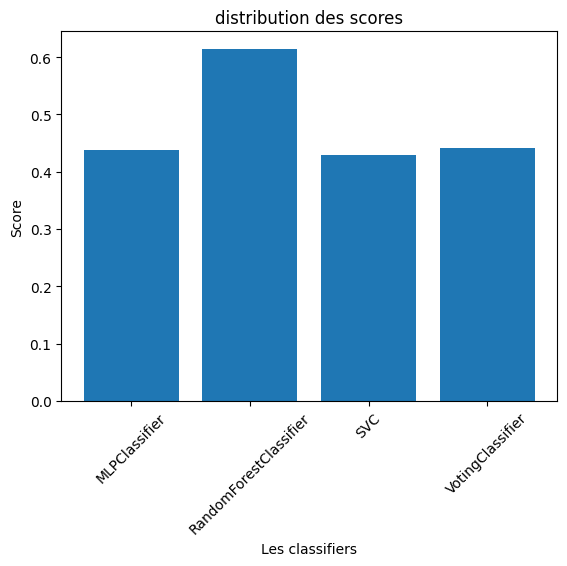

In [874]:
names = [item[0] for item in listScore]
values = [item[1] for item in listScore]

plt.bar(names, values)
plt.xlabel('Les classifiers')
plt.ylabel('Score')
plt.title('distribution des scores')


plt.xticks(rotation=45)


plt.show()

# Évaluation sur les données d'apprentissage

In [875]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [891]:
def evaluation(objet, X, Y):

    #prédiction 
    Y_pred = cross_val_predict(objet, X, Y)
    
    #Calcul du score taux de classification
    accuracy = accuracy_score(Y, Y_pred)
    # Matrice de confusion à partir des classes réelle et celles prédites
    matrice_confusion = ConfusionMatrixDisplay.from_predictions(Y, Y_pred, normalize="true",  values_format=".0%") #résultat en pourcentage
    # Précision du modèle
    precision = precision_score(Y, Y_pred, average='weighted',zero_division=1)
    # Rappel du modèle
    rappel = recall_score(Y, Y_pred, average='weighted')

    return Y_pred, accuracy, precision, rappel


### SVM

{'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
accuracy  of the model : 0.4380429812528578
Rappel  of the model : 0.46641912217009035
Precision  of the model : 0.4380429812528578


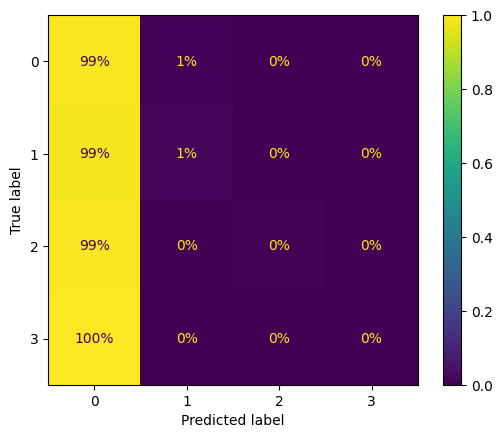

In [892]:
import matplotlib.pyplot  as plt
model = joblib.load("../models/modelSVC.pkl")
best_params_svm = grid_search.best_params_
print(best_params_svm)
acc = evaluation(model,X_test,y_test)

print(f"accuracy  of the model : {acc[1]}")
print(f"Rappel  of the model : {acc[2]}")
print(f"Precision  of the model : {acc[3]}")


### Random forest

accuracy  of the model : 0.6021947873799726
Rappel  of the model : 0.5740253309596764
Precision  of the model : 0.6021947873799726


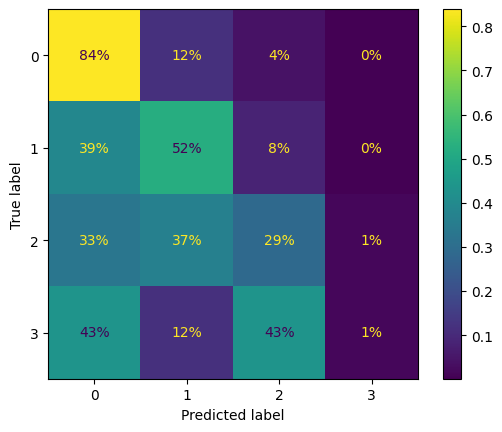

In [894]:
import matplotlib.pyplot  as plt
model = joblib.load("../models/modelRF.pkl")
acc = evaluation(model,X_test,y_test)
print(f"accuracy  of the model : {acc[1]}")
print(f"Rappel  of the model : {acc[2]}")
print(f"Precision  of the model : {acc[3]}")

### MLP

accuracy  of the model : 0.43438500228623683
Rappel  of the model : 0.5010236871944662
Precision  of the model : 0.43438500228623683


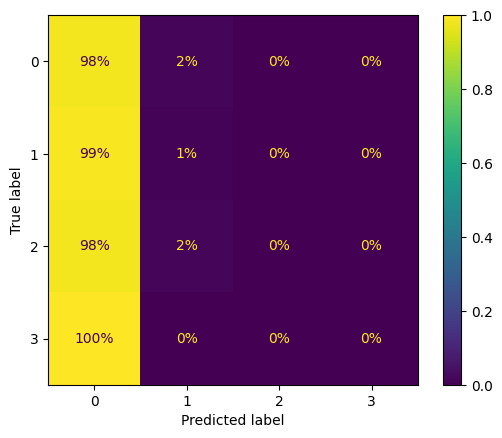

In [893]:
import matplotlib.pyplot  as plt
model = joblib.load("../models/modelMLP.pkl")
acc = evaluation(model,X_test,y_test)
print(f"accuracy  of the model : {acc[1]}")
print(f"Rappel  of the model : {acc[2]}")
print(f"Precision  of the model : {acc[3]}")